<a href="https://colab.research.google.com/github/AminTurmudiYusup/task_one_ml/blob/master/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

uploaded = files.upload()

Saving car_price.csv to car_price.csv


**1. считывать данные**



In [3]:
df=pd.read_csv('car_price.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**2. Предварительная обработка данных**


In [5]:
# Basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**3. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые**

In [6]:
df = df.drop(['car_ID'], axis=1)

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [8]:
# Check for duplicates and remove them
df_cleaned = df.drop_duplicates()

**4. Визуализируйте данные, чтобы получить представление**

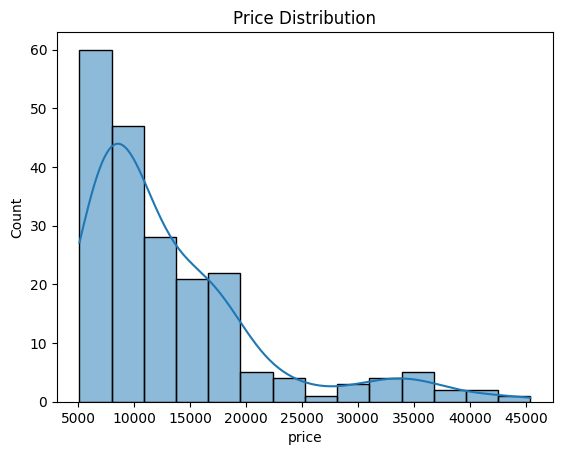

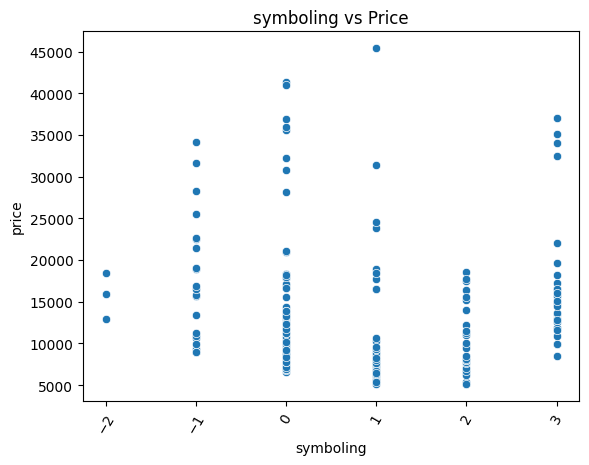

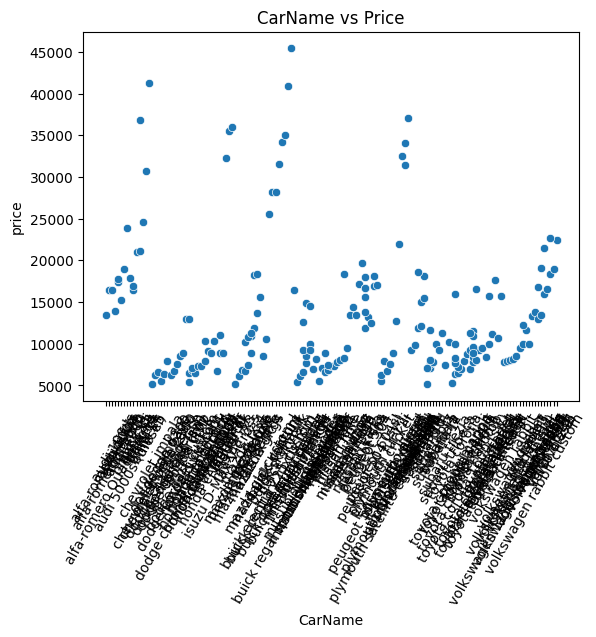

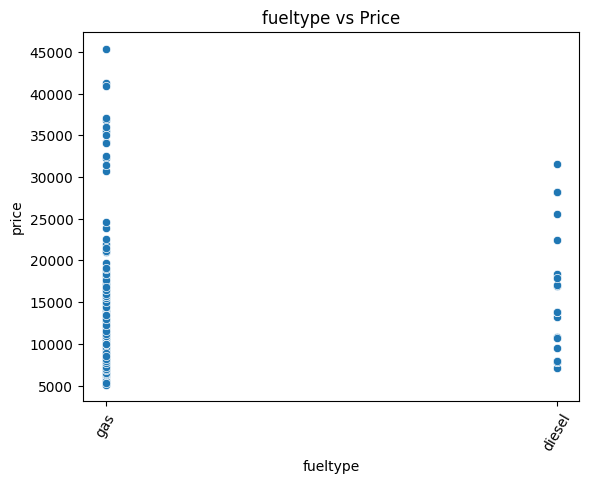

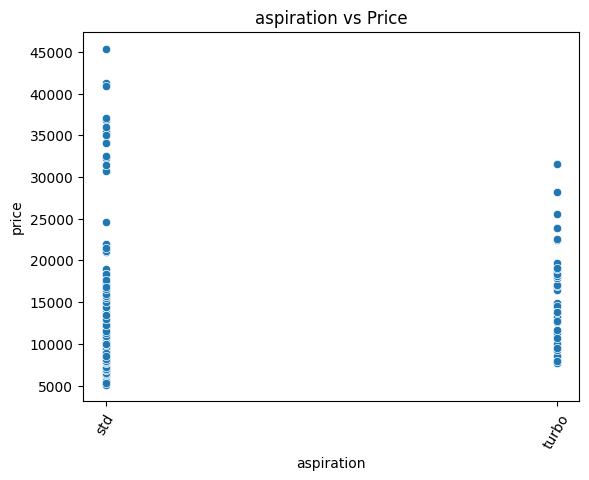

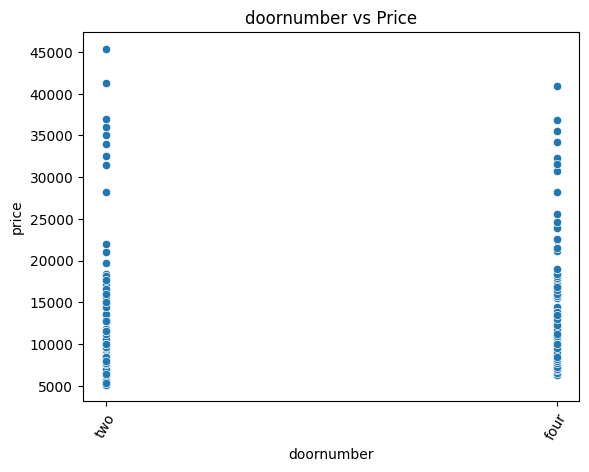

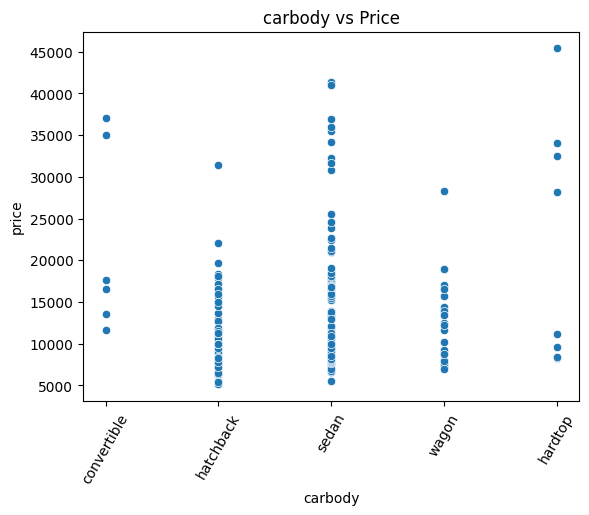

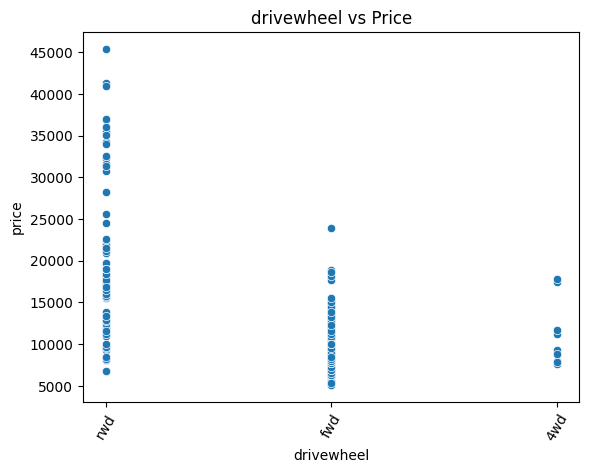

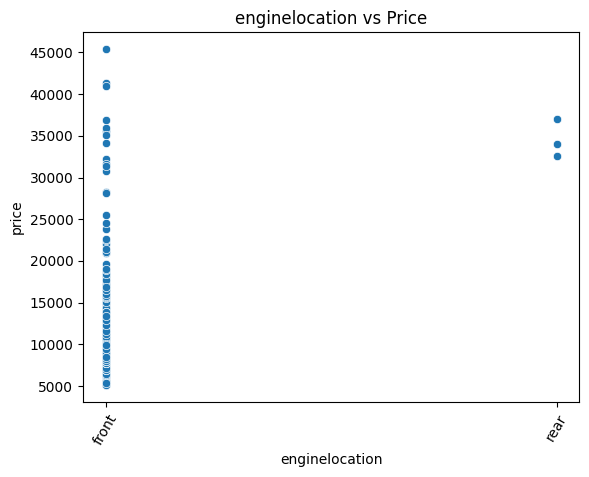

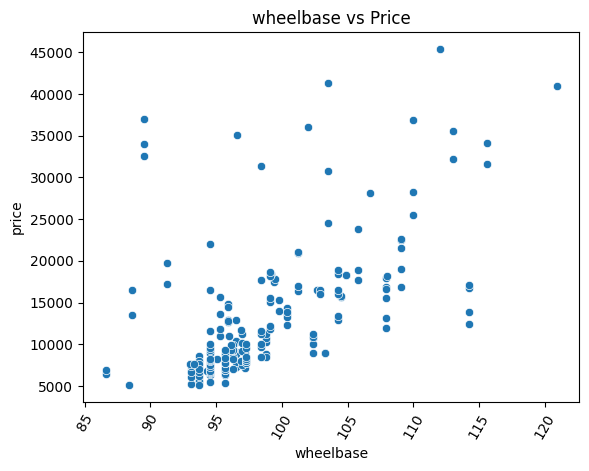

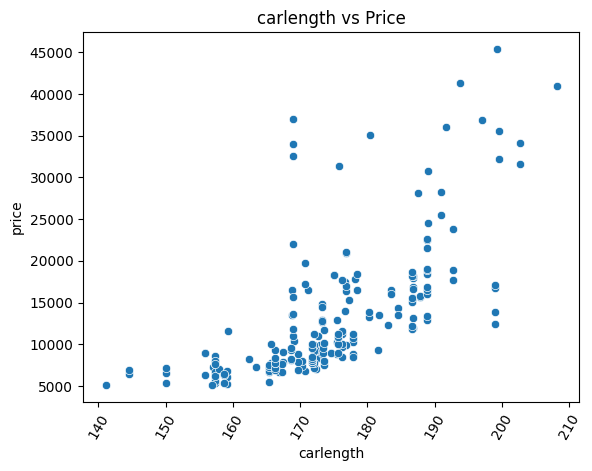

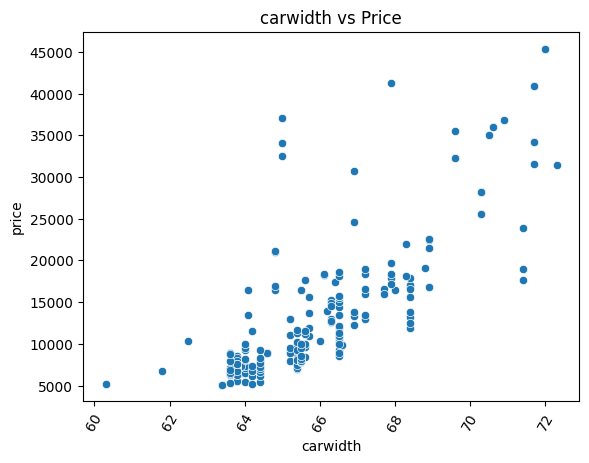

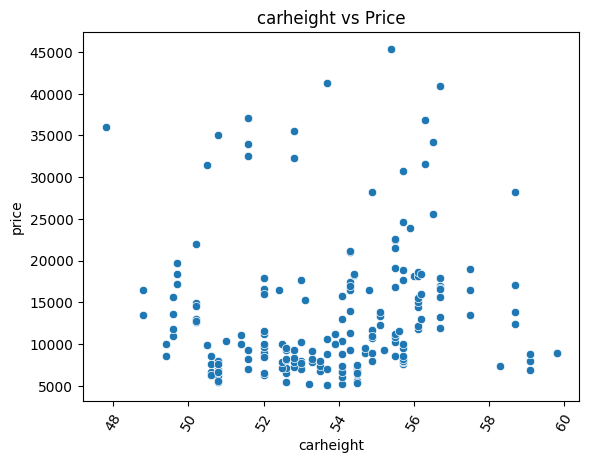

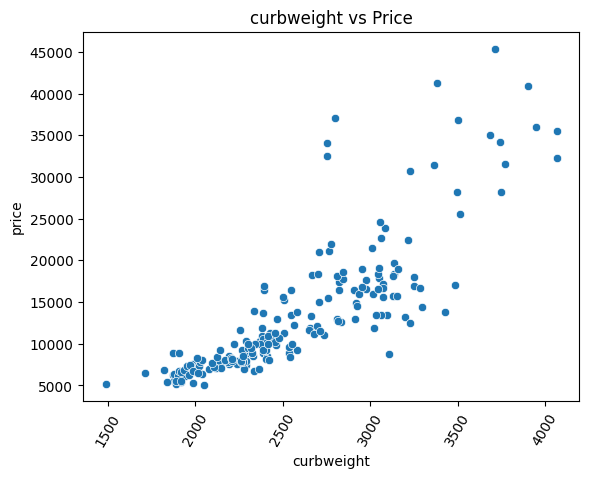

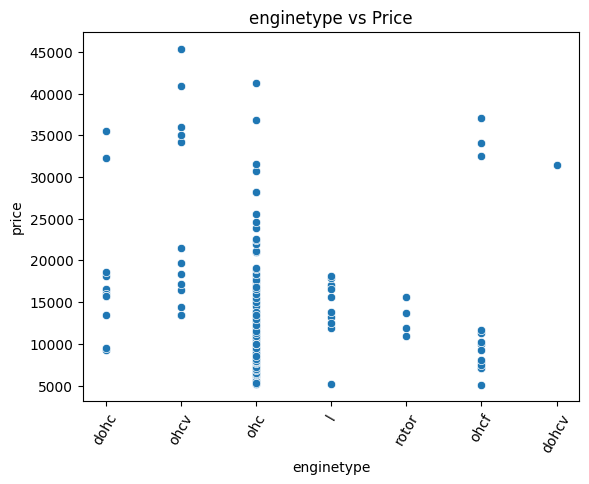

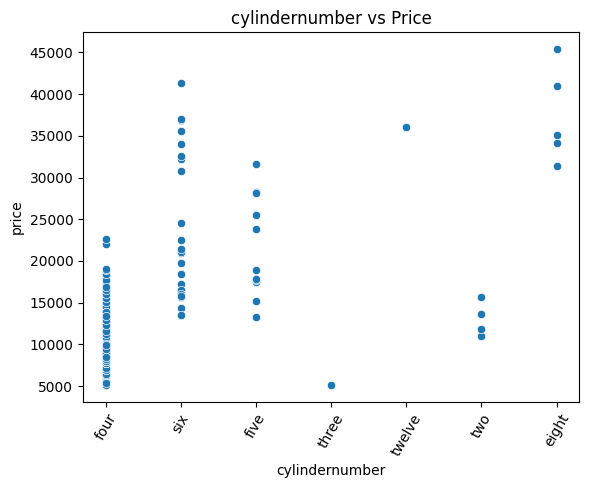

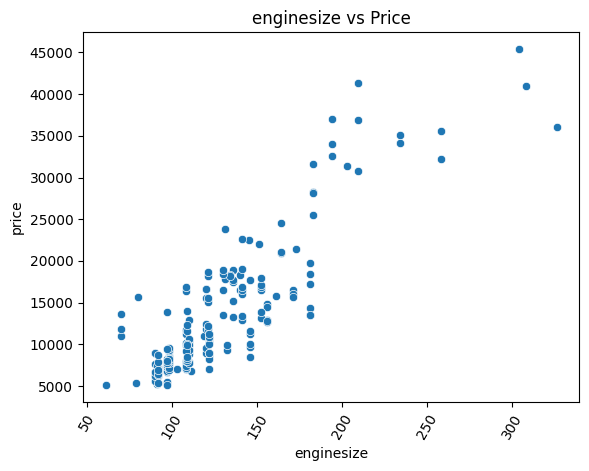

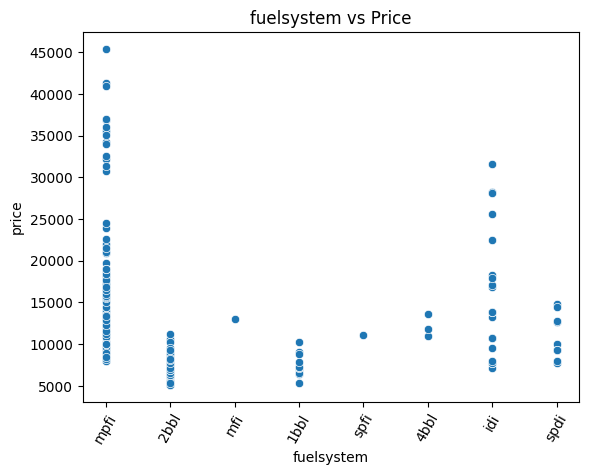

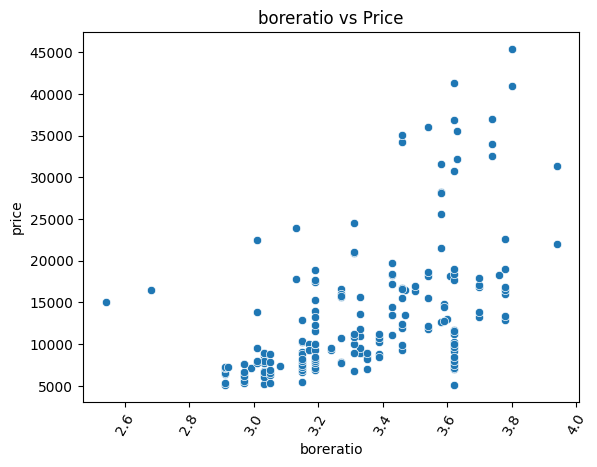

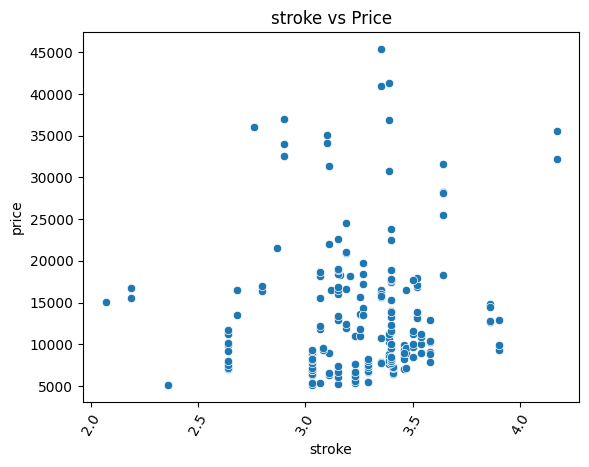

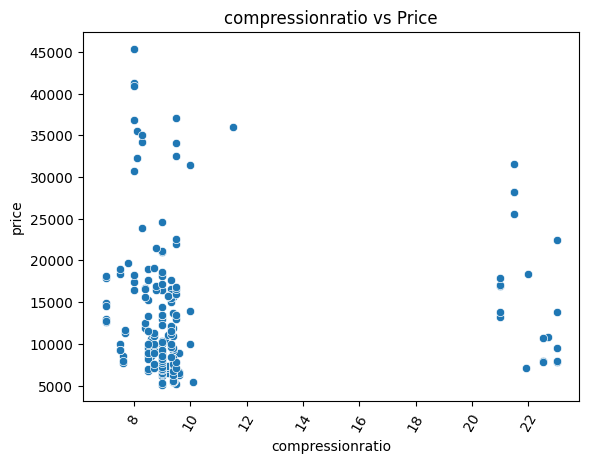

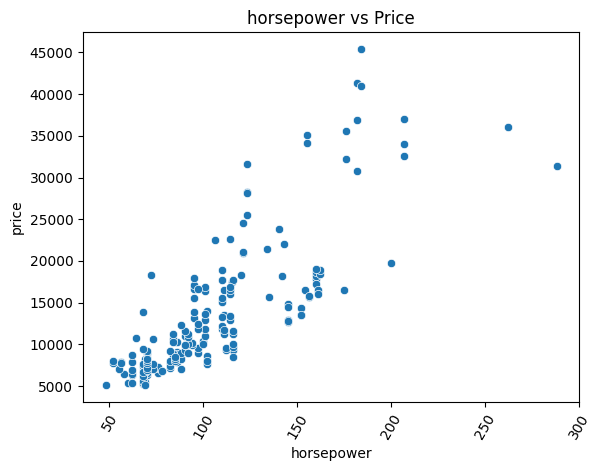

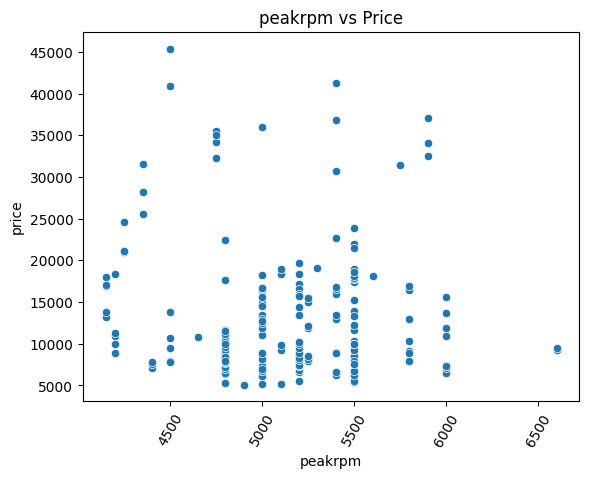

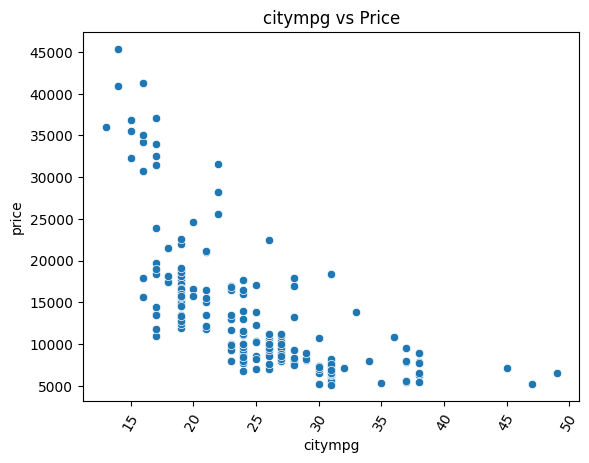

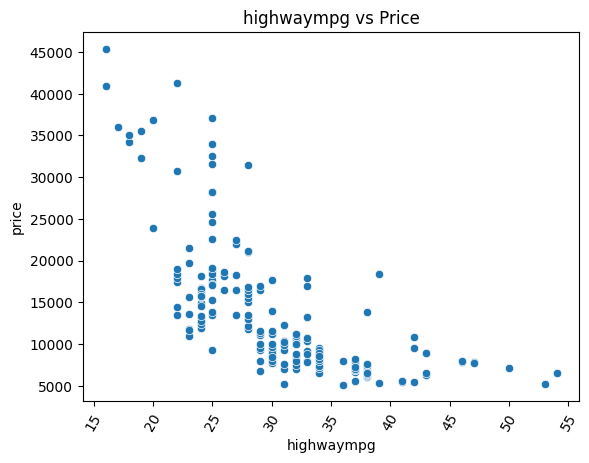

In [9]:
# Distribution of target variable (price)
sns.histplot(df_cleaned['price'], kde=True)
plt.title('Price Distribution')
plt.show()


# Scatter plots to visualize feature relationships with target
for column in df_cleaned.columns:
    if column != 'price':  # Assuming 'price' is the target
        sns.scatterplot(x=df_cleaned[column], y=df_cleaned['price'])
        plt.xticks(rotation=60)
        plt.title(f'{column} vs Price')
        plt.show()

**5. Разделить данные на обучающий и тестовый наборы и масштабирование функций с помощью StandardScaler.**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Transform categorical variables (if any)
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# Split the data into features (X) and target (y)
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


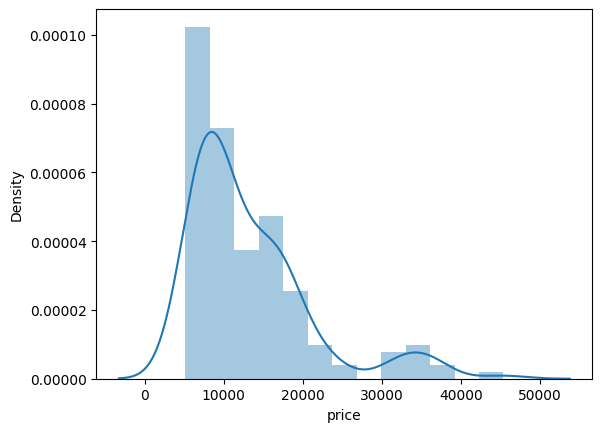

In [11]:
sns.distplot(y_train);

**6. Выберите модель машинного обучения (линейная регрессия)**

In [12]:
from sklearn.linear_model import LinearRegression
# Step 1: Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Train the model with training data

LinearRegression()

**7. Попробуйте сделать прогноз после обучения модели и оценить модель с помощью RMSE**

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(X_train_scaled)  # Predict the target values for X_train_scaled
y_test_pred = model.predict(X_test_scaled)  # Predict the target values for X_test_scaled

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))



Test RMSE = 3.2292766410460096e+16
Train RMSE = 469.7363072123009


**8. Реализация градиентного спуска or gradient_descent(X, y) и обучающий набор данных с использованием градиентного спуска**

In [14]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, regularization=0.1):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    for i in range(n_iterations):
        # Predictions
        y_pred = np.dot(X, w) + b

        # Compute the gradient
        dw = (1/m) * np.dot(X.T, (y_pred - y)) + (regularization/m) * w
        db = (1/m) * np.sum(y_pred - y)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

# Train the model on the training data
w, b = gradient_descent(X_train_scaled, y_train)

**9. Сделать прогноз после обучения с использованием градиентного спуска (X, y)**

In [15]:


# Make predictions
y_train_pred = np.dot(X_train_scaled, w) + b
y_test_pred = np.dot(X_test_scaled, w) + b

# Compute evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation results
print(f'Training MSE: {mse_train}, RMSE: {rmse_train}, R2: {r2_train}')
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}')


Training MSE: 544863.4991837371, RMSE: 738.1486972038473, R2: 0.9908637951497619
Test MSE: 17377591.394551266, RMSE: 4168.643831577755, R2: 0.7798745085325502


**10. Обучить модель, используя существующую библиотеку. Например, в sklearn для
L2-регуляризатора можно использовать Ridge.**

In [17]:
from sklearn.linear_model import Ridge

# Train Ridge regression model from sklearn
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Compare performance with gradient descent model
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print(f'Ridge MSE (Train): {mse_train_ridge}, MSE (Test): {mse_test_ridge}')

print(f'Ridge RMSE (Train): {rmse_train_ridge}, MSE (Test): {rmse_test_ridge}')

Ridge MSE (Train): 190003.63745789486, MSE (Test): 26166403.979016338
Ridge RMSE (Train): 435.89406678445954, MSE (Test): 5115.310741198069


**11. Повторить тоже самое, но используя кросс-валидацию.**

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
mse_cv = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Compute mean and standard deviation of cross-validation MSE
mean_mse = -mse_cv.mean()
std_mse = mse_cv.std()

print(f'Cross-validation MSE: Mean = {mean_mse}, Std = {std_mse}')


Cross-validation MSE: Mean = 18347842.63861009, Std = 7450336.560790552


**12. Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.**

In [19]:
from sklearn.feature_selection import RFE

# Create an RFE model
rfe = RFE(estimator=Ridge(), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print('Selected Features:', selected_features)


Selected Features: Index(['carwidth', 'curbweight', 'enginesize', 'CarName_bmw x3',
       'enginelocation_rear'],
      dtype='object')


**13. Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.**

In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter
print('Best alpha:', grid_search.best_params_)


# Predictions
y_train_pred_grid_search = grid_search.predict(X_train_scaled)
y_test_pred_grid_search = grid_search.predict(X_test_scaled)

# Compare performance with gradient descent model
mse_train_grid_search = mean_squared_error(y_train, y_train_pred_grid_search)
mse_test_grid_search = mean_squared_error(y_test, y_test_pred_grid_search)
rmse_train_ridge = np.sqrt(mse_train_grid_search)
rmse_test_ridge = np.sqrt(mse_test_grid_search)

print(f'GridSearchCV MSE (Train): {mse_train_ridge}, MSE (Test): {mse_test_ridge}')

print(f'GridSearchCV RMSE (Train): {rmse_train_ridge}, MSE (Test): {rmse_test_ridge}')


Best alpha: {'alpha': 10}
GridSearchCV MSE (Train): 190003.63745789486, MSE (Test): 26166403.979016338
GridSearchCV RMSE (Train): 737.1786524406339, MSE (Test): 4200.151939259354


**14. Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.**

In [21]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, regularization_strength=0):
    m, n = X.shape  # m = number of samples, n = number of features
    w = np.zeros(n)  # Initialize weights for each feature
    b = 0  # Initialize bias term
    y = np.array(df_cleaned['price'])
    for i in range(n_iterations):
        # Randomly shuffle the data
        idx = np.random.randint(0, m)  # Random index
        xi = X[idx, :].reshape(1, -1)  # Select one random sample and reshape it to a row vector
        yi = y[idx]  # Corresponding target value

        # Ensure yi is a scalar, if it comes from a Series
        if isinstance(yi, np.ndarray) or isinstance(yi, pd.Series):
            yi = yi.item()  # Convert to scalar if needed

        # Prediction
        y_pred = np.dot(xi, w) + b

        # Gradients for a single sample
        dw = (xi.T * (y_pred - yi)).flatten() + regularization_strength * w  # Gradient for weights
        db = y_pred - yi  # Gradient for bias

        # Update weights and bias
        w -= learning_rate * dw  # No need to flatten dw here as it's already shaped correctly
        b -= learning_rate * db

    return w, b




# Define hyperparameters for stochastic gradient descent
sgd_params = {
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate
    'n_iterations': [500, 1000, 2000],  # Number of iterations
    'regularization_strength': [0, 0.01, 0.1]  # L2 regularization strength
}

# Function to test different hyperparameters for stochastic gradient descent
def tune_sgd(X_train, y_train, X_test, y_test, sgd_params):
    best_mse = float('inf')
    best_params = None
    best_w, best_b = None, None

    for lr in sgd_params['learning_rate']:
        for n_iter in sgd_params['n_iterations']:
            for reg_strength in sgd_params['regularization_strength']:
                w, b = stochastic_gradient_descent(X_train, y_train, learning_rate=lr, n_iterations=n_iter, regularization_strength=reg_strength)
                y_pred = np.dot(X_test, w) + b
                mse = mean_squared_error(y_test, y_pred)

                if mse < best_mse:
                    best_mse = mse
                    best_params = {'learning_rate': lr, 'n_iterations': n_iter, 'regularization_strength': reg_strength}
                    best_w, best_b = w, b

    print("Best Stochastic Gradient Descent Hyperparameters:", best_params)
    print(f"Best MSE for SGD: {best_mse}")
    return best_w, best_b

# Tune and train the stochastic gradient descent model
best_sgd_w, best_sgd_b = tune_sgd(X_train_scaled, y_train, X_test_scaled, y_test, sgd_params)

Best Stochastic Gradient Descent Hyperparameters: {'learning_rate': 0.001, 'n_iterations': 1000, 'regularization_strength': 0}
Best MSE for SGD: 122111085.73876944


**15. Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.
**

In [24]:
import numpy as np

def mini_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=32, regularization_strength=0):
    m, n = X.shape  # m = number of samples, n = number of features
    w = np.zeros(n)  # Initialize weights for each feature
    b = 0  # Initialize bias term
    y = np.array(df_cleaned['price'])

    for i in range(n_iterations):
        # Shuffle the dataset at the start of each iteration
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process mini-batches
        for j in range(0, m, batch_size):
            # Create a mini-batch
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            # Predictions for the mini-batch
            y_pred = np.dot(X_batch, w) + b

            # Gradients for mini-batch
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch)) + regularization_strength * w  # Gradient for weights
            db = (1 / len(y_batch)) * np.sum(y_pred - y_batch)  # Gradient for bias

            # Update weights and bias
            w -= learning_rate * dw
            b -= learning_rate * db

    return w, b

    # Example usage
mini_batch_params = {
    'learning_rate': 0.01,
    'n_iterations': 1000,
    'batch_size': 32,
    'regularization_strength': 0.1
}

w_mini_batch, b_mini_batch = mini_batch_gradient_descent(
    X_train_scaled, y_train,
    learning_rate=mini_batch_params['learning_rate'],
    n_iterations=mini_batch_params['n_iterations'],
    batch_size=mini_batch_params['batch_size'],
    regularization_strength=mini_batch_params['regularization_strength']
)

print("Mini Batch Gradient Descent Weights:", w_mini_batch)
print("Mini Batch Gradient Descent Bias:", b_mini_batch)



Mini Batch Gradient Descent Weights: [  243.22772924  -386.88693426  -562.00591205  -742.78635049
   689.32452243  -243.8591137   -474.94934209   206.3393438
   642.44643601  -106.21060226   169.34053217  -341.49446188
  -426.48420578  -446.95753929  -523.4362892   -714.47519843
  -453.73514293  -209.08705842   -58.01250881   618.50977007
    20.46741077     0.           554.12852906  1188.62641775
  -713.54190805   -78.13572752     0.             0.
  -439.18820498     0.             0.             0.
     0.            13.39642617  -395.72455483  -108.18795602
  -262.2003708      0.           340.87108975  -333.76608763
  -519.55101508  -254.05692206     0.           -77.77497823
   437.43552473  -108.04082576    -5.88722901   261.8393917
   353.45977026  -666.90999548  -205.57239771  -386.79011968
   -23.77821261  -402.76715001   245.57353948  -656.23188506
  -426.38652751  -427.95695177  -187.06121996     0.
  -600.88688869   168.42212083  -377.23518875   377.00354113
  -668.638281